# Computational Social Science Project #2 

**Enter your Name:**___Jonathan Landeros-Cisneros_________

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [1]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [2]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("Diabetes with Population Info by County 2017.csv",dtype={"CountyFIPS": str}) 

In [3]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [4]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [5]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

['Suppressed']


In [6]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique())


['No Data']


In [7]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------

print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique())


['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [8]:

# Recode variables
diabetes = diabetes[~diabetes['Diabetes_Number'].isin(["Suppressed", "No Data"])]
diabetes = diabetes[~diabetes['Obesity_Number'].isin(["Suppressed", "No Data"])]
diabetes = diabetes[~diabetes['Physical_Inactivity_Number'].isin(["Suppressed", "No Data"])]

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 


# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int')
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int')
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int')

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] != "-"]
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = (
    diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']
    .replace(['No Data'], np.nan)  
)
# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float64')

print(diabetes.head()) 

           County    State CountyFIPS  Diabetes_Number  Obesity_Number  \
0  Autauga County  Alabama      01001             5178           13489   
1  Baldwin County  Alabama      01003            16707           48542   
2  Barbour County  Alabama      01005             3400            8009   
3     Bibb County  Alabama      01007             2371            6534   
4   Blount County  Alabama      01009             6282           14227   

   Physical_Inactivity_Number  \
0                       12525   
1                       40024   
2                        5431   
3                        5827   
4                       14365   

   sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                  
1                                               86.6                                  
2                                               76.2                                  
3       

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [9]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

print(diabetes[rc_cols].head())



   Diabetes_Number  Obesity_Number  Physical_Inactivity_Number  \
0         0.093804        0.244366                    0.226902   
1         0.080281        0.233255                    0.192324   
2         0.131875        0.310643                    0.210651   
3         0.105251        0.290052                    0.258667   
4         0.108977        0.246804                    0.249198   

   race_total population_one race  race_total population_two or more races  \
0                        0.981341                                 0.018659   
1                        0.982836                                 0.017164   
2                        0.986308                                 0.013692   
3                        0.991699                                 0.008301   
4                        0.983780                                 0.016220   

   race_total population_one race_1  race_total population_one race_white  \
0                          0.981341                      

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [10]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose()

# note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

count           mean  \
Diabetes_Number                                     3112.0       0.092857   
Obesity_Number                                      3112.0       0.251666   
Physical_Inactivity_Number                          3112.0       0.200861   
sex and age_total population_65 years and over_...  3112.0      84.275643   
race_total population                               3112.0  103682.624036   
race_total population_one race                      3112.0       0.976059   
race_total population_two or more races             3112.0       0.023941   
race_total population_one race_1                    3112.0       0.976059   
race_total population_one race_white                3112.0       0.831107   
race_total population_one race_black or african...  3112.0       0.090215   
race_total population_one race_american indian ...  3112.0       0.019398   
race_total population_one race_american indian ...  3112.0       0.001791   
race_total population_one race_american indian ...  3112.0       0.001338   
race_total population_one race_american indian ...  3112.0       0.001229   
race_total population_one race_american indian ...  3112.0       0.003315   
race_total population_one race_asian                3112.0       0.013749   
race_total population_one race_asian_asian indian   3112.0       0.002628   
race_total population_one race_asian_chinese        3112.0       0.002644   
race_total population_one race_asian_filipino       3112.0       0.002744   
race_total population_one race_asian_japanese       3112.0       0.000707   
race_total population_one race_asian_korean         3112.0       0.001174   
race_total population_one race_asian_vietnamese     3112.0       0.001255   
race_total population_one race_asian_other asian    3112.0       0.002598   
race_total population_one race_native hawaiian ...  3112.0       0.000874   
race_total population_one race_native hawaiian ...  3112.0       0.000303   
race_total population_one race_native hawaiian ...  3112.0       0.000142   
race_total population_one race_native hawaiian ...  3112.0       0.000134   
race_total population_one race_native hawaiian ...  3112.0       0.000295   
race_total population_one race_some other race      3112.0       0.020716   
race_total population_two or more races_1           3112.0       0.023941   
race_total population_two or more races_white a...  3112.0       0.006444   
race_total population_two or more races_white a...  3112.0       0.008618   
race_total population_two or more races_white a...  3112.0       0.003021   
race_total population_two or more races_black o...  3112.0       0.000652   
race alone or in combination with one or more o...  3112.0       1.000000   
race alone or in combination with one or more o...  3112.0       0.852907   
race alone or in combination with one or more o...  3112.0       0.098875   
race alone or in combination with one or more o...  3112.0       0.029923   
race alone or in combination with one or more o...  3112.0       0.018213   
race alone or in combination with one or more o...  3112.0       0.002067   
race alone or in combination with one or more o...  3112.0       0.023626   
hispanic or latino and race_total population        3112.0       1.000000   
hispanic or latino and race_total population_hi...  3112.0       0.093201   
hispanic or latino and race_total population_hi...  3112.0       0.069331   
hispanic or latino and race_total population_hi...  3112.0       0.005656   
hispanic or latino and race_total population_hi...  3112.0       0.001568   
hispanic or latino and race_total population_hi...  3112.0       0.016645   
hispanic or latino and race_total population_no...  3112.0       0.906799   
hispanic or latino and race_total population_no...  3112.0       0.765065   
hispanic or latino and race_total population_no...  3112.0       0.088817   
hispanic or latino and race_total population_no...  3112.0       0.018016   
hispanic or latino and race_total population_no..

#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [11]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['race_total population_one race_1',
 'hispanic or latino and race_total population',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1',
 'race_total population_two or more races_1',
 'sex and age_total population_65 years and over_1']

In [12]:

# drop columns from duplicates list

# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [13]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes

County    State CountyFIPS  Diabetes_Number  Obesity_Number  \
0        Autauga County  Alabama      01001         0.093804        0.244366   
1        Baldwin County  Alabama      01003         0.080281        0.233255   
2        Barbour County  Alabama      01005         0.131875        0.310643   
3           Bibb County  Alabama      01007         0.105251        0.290052   
4         Blount County  Alabama      01009         0.108977        0.246804   
...                 ...      ...        ...              ...             ...   
3215  Sweetwater County  Wyoming      56037         0.058028        0.212208   
3216       Teton County  Wyoming      56039         0.019038        0.088946   
3217       Uinta County  Wyoming      56041         0.069872        0.238973   
3218    Washakie County  Wyoming      56043         0.078361        0.213802   
3219      Weston County  Wyoming      56045         0.084648        0.283803   

      Physical_Inactivity_Number  \
0                       0.226902   
1                       0.192324   
2                       0.210651   
3                       0.258667   
4                       0.249198   
...                          ...   
3215                    0.170410   
3216                    0.086951   
3217                    0.170751   
3218                    0.210112   
3219                    0.194789   

      sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                                  76.5                                  
1                                                  86.6                                  
2                                                  76.2                                  
3                                                  80.5                                  
4                                                  79.7                                  
...                                                 ...                                  
3215                                               92.0                                  
3216                                               94.8                                  
3217                                               97.6                                  
3218                                               89.0                                  
3219                                               90.6                                  

      race_total population  race_total population_one race  \
0                     55200                        0.981341   
1                    208107                        0.982836   
2                     25782                        0.986308   
3                     22527                        0.991699   
4                     57645                        0.983780   
...                     ...                             ...   
3215                  44117                        0.979804   
3216                  23059                        0.992020   
3217                  20609                        0.965161   
3218                   8129                        0.958420   
3219                   7100                        0.979718   

      race_total population_two or more races  \
0                                    0.018659   
1                                    0.017164   
2                                    0.013692   
3                                    0.008301   
4                                    0.016220   
...                                       ...   
3215                                 0.020196   
3216                                 0.007980   
3217                                 0.034839   
3218                                 0.041580   
3219                                 0.020282   

      race_total population_one race_white  \
0                                 0.768786   
1                                 0.862662   
2                                 0.473819   
3           

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

C:\Users\lande\AppData\Local\Temp\ipykernel_24964\506451286.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_diabetes, x='Region', y='Diabetes_Number', palette='viridis')


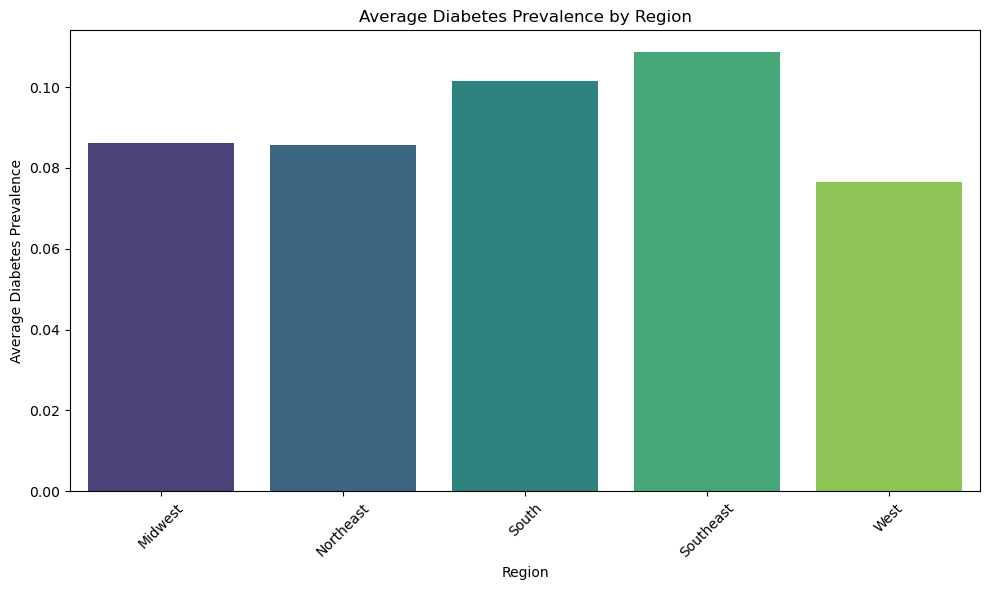

In [14]:
#
# EDA #1 and interpretations in this section 
import matplotlib.pyplot as plt
import seaborn as sns

region_diabetes = diabetes.groupby('Region')['Diabetes_Number'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=region_diabetes, x='Region', y='Diabetes_Number', palette='viridis')
plt.title('Average Diabetes Prevalence by Region')
plt.xlabel('Region')
plt.ylabel('Average Diabetes Prevalence')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



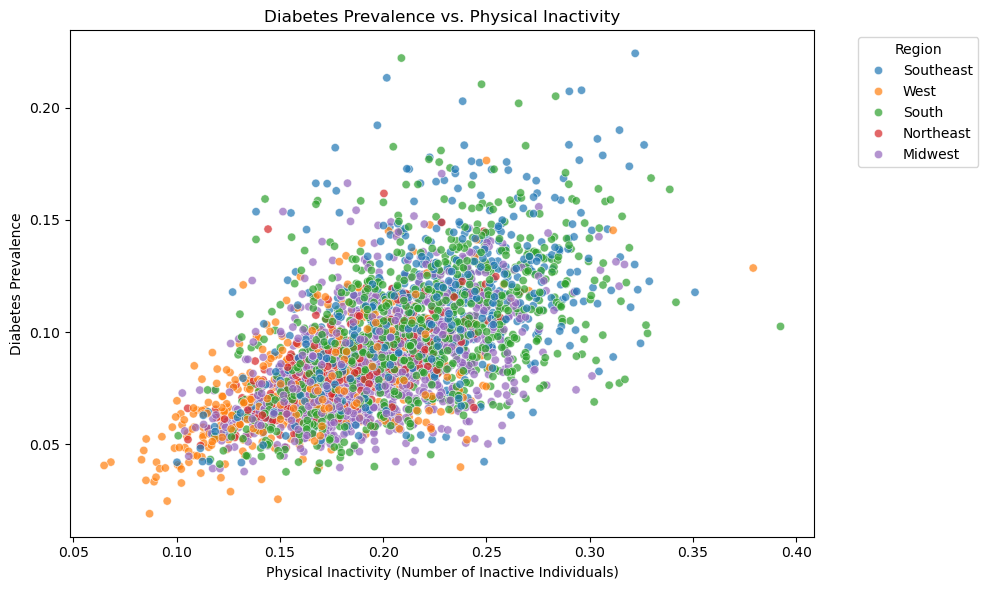

In [15]:
#
# EDA #2 and interpretations in this section 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diabetes, x='Physical_Inactivity_Number', y='Diabetes_Number', hue='Region', alpha=0.7)
plt.title('Diabetes Prevalence vs. Physical Inactivity')
plt.xlabel('Physical Inactivity (Number of Inactive Individuals)')
plt.ylabel('Diabetes Prevalence')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [16]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['County', 'State'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10)

CountyFIPS  Diabetes_Number  Obesity_Number  Physical_Inactivity_Number  \
0      01001         0.093804        0.244366                    0.226902   
1      01003         0.080281        0.233255                    0.192324   
2      01005         0.131875        0.310643                    0.210651   
3      01007         0.105251        0.290052                    0.258667   
4      01009         0.108977        0.246804                    0.249198   
5      01011         0.224208        0.353748                    0.321967   
6      01013         0.145318        0.349513                    0.300974   
7      01015         0.127648        0.298580                    0.234140   
8      01017         0.141518        0.324425                    0.220570   
9      01019         0.122848        0.300429                    0.237342   

   sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                  
1                                               86.6                                  
2                                               76.2                                  
3                                               80.5                                  
4                                               79.7                                  
5                                               73.6                                  
6                                               69.1                                  
7                                               73.7                                  
8                                               73.3                                  
9                                               86.7                                  

   race_total population  race_total population_one race  \
0                  55200                        0.981341   
1                 208107                        0.982836   
2                  25782                        0.986308   
3                  22527                        0.991699   
4                  57645                        0.983780   
5                  10352                        1.000000   
6                  20025                        0.983870   
7                 115098                        0.976229   
8                  33826                        0.989742   
9                  25853                        0.991955   

   race_total population_two or more races  \
0                                 0.018659   
1                                 0.017164   
2                                 0.013692   
3                                 0.008301   
4                                 0.016220   
5                                 0.000000   
6                                 0.016130   
7                                 0.023771   
8                                 0.010258   
9                                 0.008045   

   race_total population_one race_white  \
0                              0.768786   
1                              0.862662   
2                              0.473819   
3                              0.766547   
4                              0.955052   
5                              0.219861   
6                              0.520050   
7                              0.743349   
8                              0.575977   
9                              0.928209   

   race_total population_one race_black or african american  \
0                                           0.191395          
1                                           0.094970          
2                                           0.475758          
3                                           0.222755          
4                                           0.014954          
5                                           0.762461          
6                                           0.452185          
7                                           0.2057

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [17]:
#
# Partition data
#-----------

# import library
import pandas as pd
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number'] 
# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(columns=['Diabetes_Number', 'race alone or in combination with one or more other races_total population'], 
                  axis=1)



Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

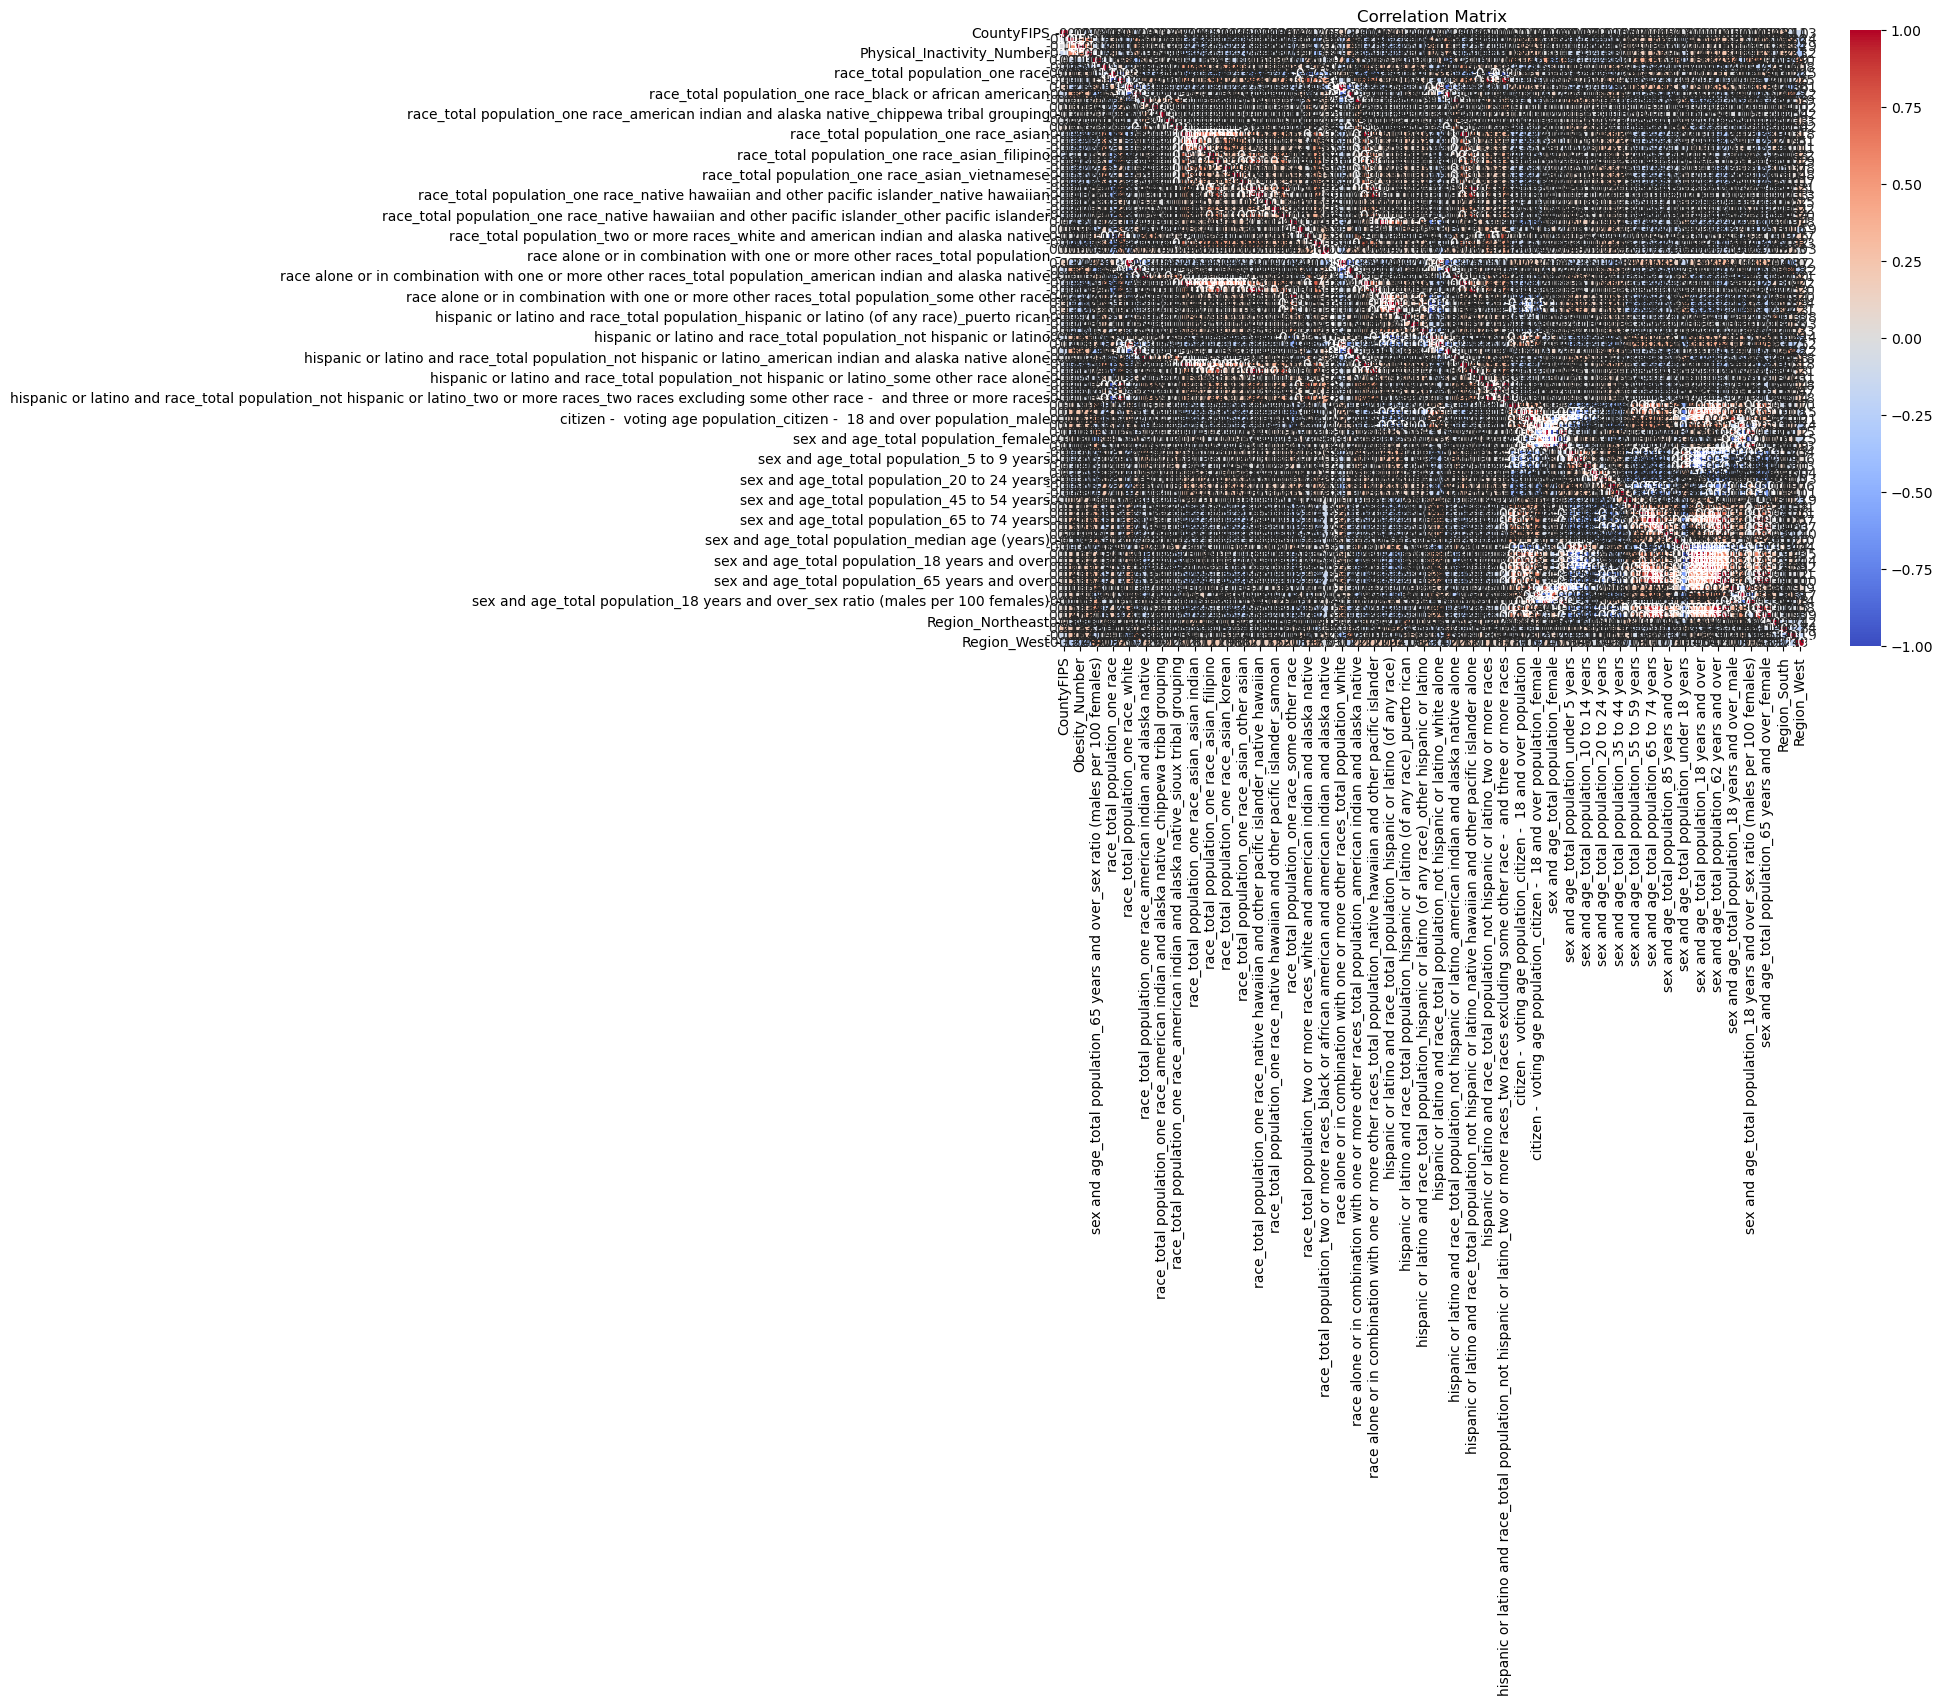

In [18]:
#
# Feature selection
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = diabetes_clean.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Missing values:
 CountyFIPS                                                                                                                                              0
Obesity_Number                                                                                                                                          0
Physical_Inactivity_Number                                                                                                                              0
sex and age_total population_65 years and over_sex ratio (males per 100 females)                                                                        0
race_total population                                                                                                                                   0
race_total population_one race                                                                                                                          0
race_total population_two or more races                    

C:\Users\lande\AppData\Local\Temp\ipykernel_24964\838937370.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


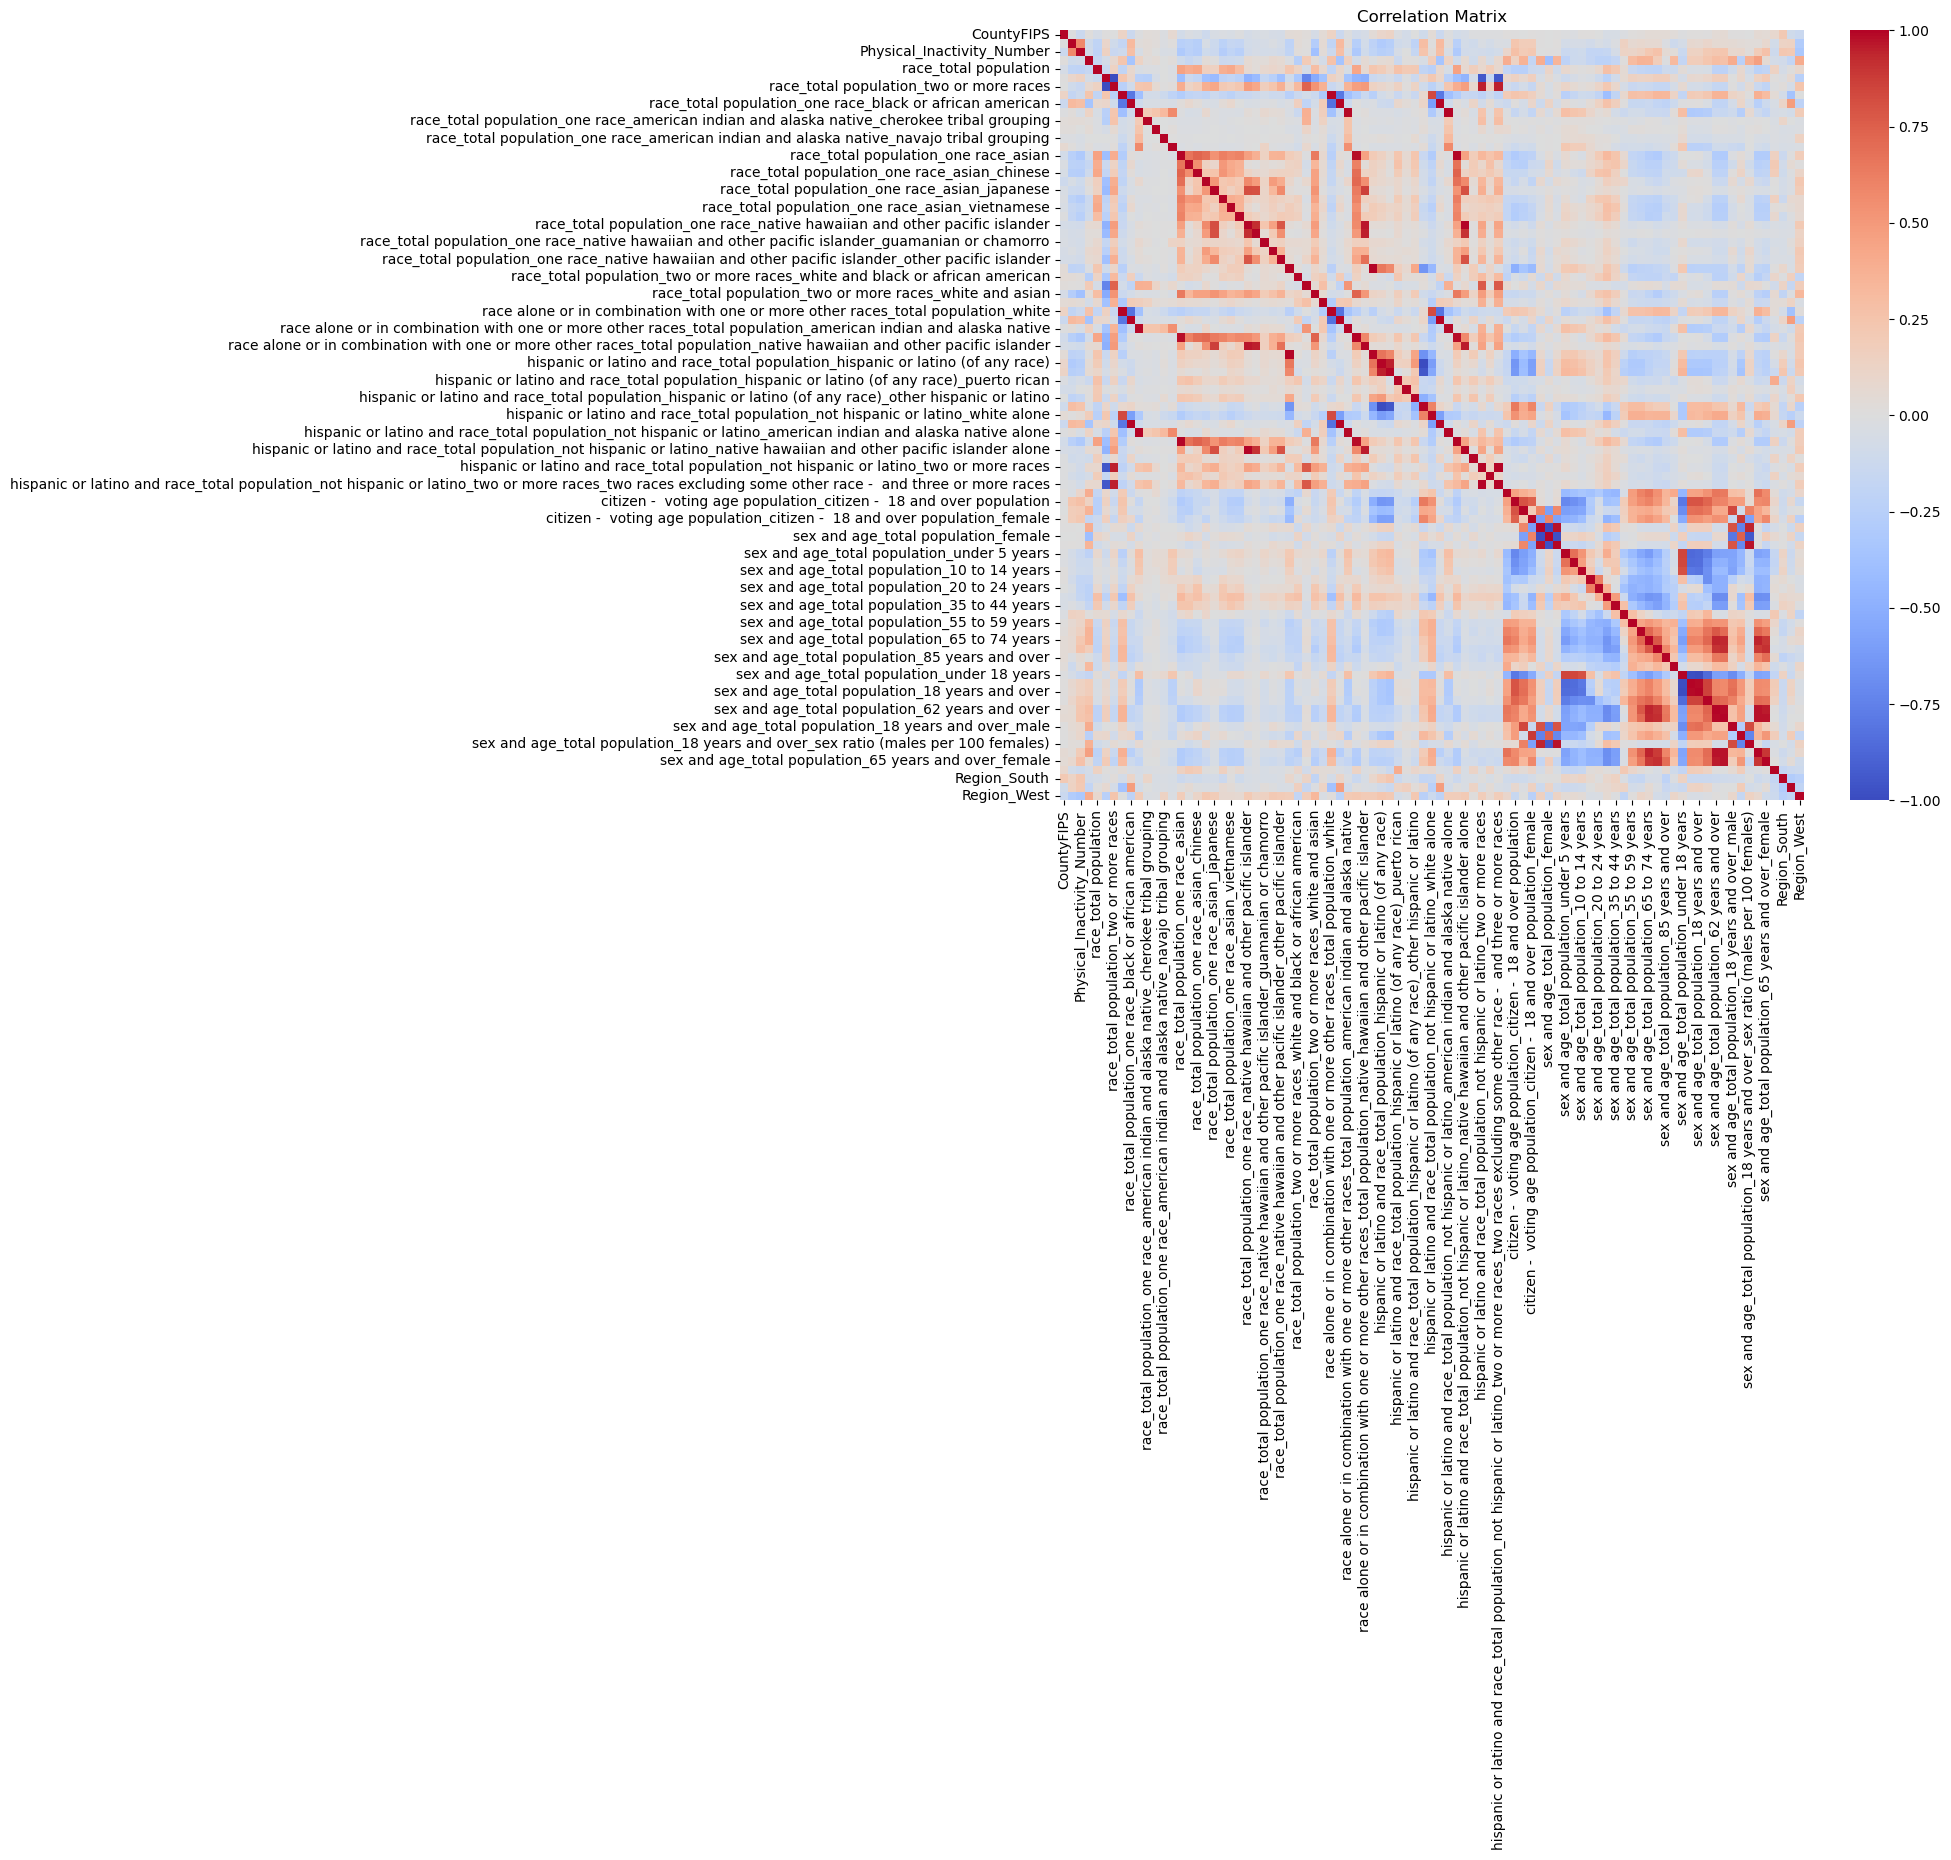


Highly correlated features (correlation > 0.8):
race_total population_one race -- race_total population_two or more races: -1.00
race_total population_one race -- hispanic or latino and race_total population_not hispanic or latino_two or more races: -0.95
race_total population_one race -- hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races: -0.95
race_total population_two or more races -- race_total population_one race: -1.00
race_total population_two or more races -- hispanic or latino and race_total population_not hispanic or latino_two or more races: 0.95
race_total population_two or more races -- hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races: 0.95
race_total population_one race_white -- race alone or in combination with one or more other races_total population_white: 0.99
race_total p

In [19]:
print("Missing values:\n", X.isnull().sum())

print("\nData types:\n", X.dtypes)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

threshold = 0.8
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
             for x, y in zip(*high_corr) if x != y]

print("\nHighly correlated features (correlation > 0.8):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} -- {feat2}: {corr:.2f}")

In [20]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=.7,      # specify proportional split for training
                                                    test_size=.3)



In [21]:


# Validation split
np.random.seed(10)

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 

X_train, X_validate, y_train, y_validate = train_test_split(X_train, 
                                                           y_train,
                                                           test_size=0.286,  # 20/70 ≈ 0.286
                                                           random_state=10)


In [22]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** 
Linear Regression: Assumes linear relationship between features and target; works well with standardized data but cannot capture non-linear relationships; Can reveal which health factors have strongest linear association with diabetes numbers.

Lasso Regression: Similar to linear regression; Can handle multicollinearity but may need very low alpha; can help identify most important predictors of diabetes.

Random Forest Regressor: Each tree sees random subset of features and samples; Less prone to overfitting than single decision trees but may need more tuning of hyperparameters; can handle both numerical and categorical features.






### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  (Linear Regression) 

In [23]:
#
# Model 1 training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.fit(X_train, y_train).predict(X_train)

train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("Linear Regression Training Performance:")
print(f"R-squared: {train_r2:.4f}")
print(f"MSE: {train_mse:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Linear Regression Training Performance:
R-squared: 0.5330
MSE: 0.0004
RMSE: 0.0191
MAE: 0.0142

Top 10 Most Important Features:
                                              Feature  Coefficient
34  race alone or in combination with one or more ...    -0.074102
45  hispanic or latino and race_total population_n...    -0.066443
47  hispanic or latino and race_total population_n...    -0.051910
44  hispanic or latino and race_total population_n...     0.043166
9   race_total population_one race_american indian...     0.042379
35  race alone or in combination with one or more ...    -0.040178
7                race_total population_one race_white    -0.035802
32  race alone or in combination with one or more ...    -0.033997
33  race alone or in combination with one or more ...     0.024960
14               race_total population_one race_asian     0.021834


#### Model 2:  (Lasso Regression) 

In [24]:
#
# Model 2 training

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso()
param_grid = {'alpha': np.logspace(-4, 0, 50)}  

grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

y_train_pred = best_lasso.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Best alpha: {best_alpha}")
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R^2 Score: {r2_train}")

coefficients = best_lasso.coef_
print(f"Coefficients: {coefficients}")



C:\Users\lande\.conda\envs\CSS\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.072e-01, tolerance: 1.554e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\lande\.conda\envs\CSS\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.189e-01, tolerance: 1.574e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\lande\.conda\envs\CSS\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5

Best alpha: 0.0001
Training Mean Squared Error: 0.0004113866129950018
Training R^2 Score: 0.47635709137976723
Coefficients: [-1.36190378e-08  1.51789434e-01  1.46508082e-01 -4.46640582e-05
 -5.84222636e-09  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -1.56333360e-02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  1.28016740e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  1.49348607e-0

#### Model 3:  (Random Forest Regressor) 

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.datasets import make_regression

def create_sample_data(n_samples=1000, n_features=10):
    """
    Create sample regression data
    """
    X, y = make_regression(
        n_samples=n_samples, 
        n_features=n_features, 
        noise=0.1,
        random_state=42
    )
    
    feature_names = [f'feature_{i}' for i in range(n_features)]
    X = pd.DataFrame(X, columns=feature_names)
    
    return X, y

def train_and_analyze_rf(X_train, y_train):
    """
    Train a Random Forest model with hyperparameter tuning and provide detailed analysis
    """
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    rf_base = RandomForestRegressor(random_state=42)
    
    grid_search = GridSearchCV(
        estimator=rf_base,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_rf = grid_search.best_estimator_
    
    y_train_pred = best_rf.predict(X_train)
    
    mse = mean_squared_error(y_train, y_train_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_train_pred)
    
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
    
    summary = {
        'best_parameters': grid_search.best_params_,
        'training_rmse': rmse,
        'training_r2': r2,
        'cv_r2_mean': cv_scores.mean(),
        'cv_r2_std': cv_scores.std(),
        'feature_importance': feature_importance,
        'best_model': best_rf
    }
    
    return summary

def print_analysis(summary):
    """
    Print formatted analysis results
    """
    print("\nRandom Forest Regression Analysis")
    print("="*40)
    
    print("\nBest Hyperparameters:")
    for param, value in summary['best_parameters'].items():
        print(f"{param}: {value}")
    
    print("\nModel Performance Metrics:")
    print(f"Training RMSE: {summary['training_rmse']:.4f}")
    print(f"Training R²: {summary['training_r2']:.4f}")
    print(f"Cross-validation R² (mean ± std): {summary['cv_r2_mean']:.4f} ± {summary['cv_r2_std']:.4f}")
    
    print("\nTop 5 Feature Importances:")
    print(summary['feature_importance'].head().to_string())

if __name__ == "__main__":
    X, y = create_sample_data(n_samples=1000, n_features=10)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    results = train_and_analyze_rf(X_train, y_train)
    
    print_analysis(results)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Random Forest Regression Analysis

Best Hyperparameters:
max_depth: 30
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200

Model Performance Metrics:
Training RMSE: 19.8095
Training R²: 0.9777
Cross-validation R² (mean ± std): 0.8366 ± 0.0270

Top 5 Feature Importances:
     feature  importance
3  feature_3    0.334598
6  feature_6    0.288661
9  feature_9    0.207391
2  feature_2    0.039320
0  feature_0    0.038126


## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

def create_sample_data(n_samples=1000, n_features=10):
    """Create sample regression data"""
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        noise=0.1,
        random_state=42
    )
    feature_names = [f'feature_{i}' for i in range(n_features)]
    X = pd.DataFrame(X, columns=feature_names)
    return X, y

def train_and_evaluate_models(X_train, X_val, y_train, y_val):
    """Train and evaluate multiple regression models"""
    
    # Initialize scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Dictionary to store all results
    results = {}
    
    # 1. Linear Regression
    lr = LinearRegression()
    lr.fit(X_train_scaled, y_train)
    
    results['linear'] = {
        'model': lr,
        'train_predictions': lr.predict(X_train_scaled),
        'val_predictions': lr.predict(X_val_scaled),
        'coefficients': pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': lr.coef_
        }).sort_values('coefficient', key=abs, ascending=False)
    }
    
    # 2. Lasso Regression with CV
    lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}
    lasso = GridSearchCV(
        Lasso(random_state=42),
        lasso_params,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    lasso.fit(X_train_scaled, y_train)
    
    results['lasso'] = {
        'model': lasso.best_estimator_,
        'train_predictions': lasso.predict(X_train_scaled),
        'val_predictions': lasso.predict(X_val_scaled),
        'best_alpha': lasso.best_params_['alpha'],
        'coefficients': pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': lasso.best_estimator_.coef_
        }).sort_values('coefficient', key=abs, ascending=False)
    }
    
    # 3. Random Forest with CV
    rf_params = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    }
    rf = GridSearchCV(
        RandomForestRegressor(random_state=42),
        rf_params,
        cv=5,
        scoring='neg_mean_squared_error'
    )
    rf.fit(X_train, y_train)  # RF doesn't require scaling
    
    results['random_forest'] = {
        'model': rf.best_estimator_,
        'train_predictions': rf.predict(X_train),
        'val_predictions': rf.predict(X_val),
        'best_params': rf.best_params_,
        'feature_importance': pd.DataFrame({
            'feature': X_train.columns,
            'importance': rf.best_estimator_.feature_importances_
        }).sort_values('importance', ascending=False)
    }
    
    # Calculate metrics for all models
    for model_name in results:
        train_pred = results[model_name]['train_predictions']
        val_pred = results[model_name]['val_predictions']
        
        results[model_name]['metrics'] = {
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'train_r2': r2_score(y_train, train_pred),
            'val_rmse': np.sqrt(mean_squared_error(y_val, val_pred)),
            'val_r2': r2_score(y_val, val_pred)
        }
    
    return results

def print_model_comparison(results):
    """Print formatted comparison of model results"""
    print("\nModel Comparison Results")
    print("="*50)
    
    # Compare metrics across models
    metrics_df = pd.DataFrame({
        model_name: {
            'Training RMSE': results[model_name]['metrics']['train_rmse'],
            'Training R²': results[model_name]['metrics']['train_r2'],
            'Validation RMSE': results[model_name]['metrics']['val_rmse'],
            'Validation R²': results[model_name]['metrics']['val_r2']
        }
        for model_name in results
    }).round(4)
    
    print("\nPerformance Metrics:")
    print(metrics_df)
    
    # Print model-specific details
    print("\nModel-Specific Details:")
    print("-"*50)
    
    # Lasso best alpha
    print(f"\nLasso Best Alpha: {results['lasso']['best_alpha']}")
    
    # Random Forest best parameters
    print("\nRandom Forest Best Parameters:")
    for param, value in results['random_forest']['best_params'].items():
        print(f"{param}: {value}")
    
    # Top features comparison
    print("\nTop 5 Features by Importance/Coefficient:")
    print("\nLinear Regression Coefficients:")
    print(results['linear']['coefficients'].head().to_string())
    
    print("\nLasso Coefficients:")
    print(results['lasso']['coefficients'].head().to_string())
    
    print("\nRandom Forest Feature Importance:")
    print(results['random_forest']['feature_importance'].head().to_string())

# Main execution
if __name__ == "__main__":
    # Create sample data
    X, y = create_sample_data(n_samples=1000, n_features=10)
    
    # Split into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Train and evaluate models
    results = train_and_evaluate_models(X_train, X_val, y_train, y_val)
    
    # Print comparison
    print_model_comparison(results)


Model Comparison Results

Performance Metrics:
                 linear   lasso  random_forest
Training RMSE    0.0963  0.0963        19.8095
Training R²      1.0000  1.0000         0.9777
Validation RMSE  0.0975  0.0975        50.9563
Validation R²    1.0000  1.0000         0.8461

Model-Specific Details:
--------------------------------------------------

Lasso Best Alpha: 0.0001

Random Forest Best Parameters:
max_depth: None
min_samples_split: 2
n_estimators: 200

Top 5 Features by Importance/Coefficient:

Linear Regression Coefficients:
     feature  coefficient
3  feature_3    77.861330
6  feature_6    71.874098
9  feature_9    59.603505
0  feature_0    34.309713
1  feature_1    32.299984

Lasso Coefficients:
     feature  coefficient
3  feature_3    77.861260
6  feature_6    71.873998
9  feature_9    59.603411
0  feature_0    34.309669
1  feature_1    32.299907

Random Forest Feature Importance:
     feature  importance
3  feature_3    0.334598
6  feature_6    0.288661
9  featur

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 


In [31]:
#
# Predict using your best model
#-----------

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

def create_sample_data(n_samples=1000, n_features=10):
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        noise=0.1,
        random_state=42
    )
    feature_names = [f'feature_{i}' for i in range(n_features)]
    X = pd.DataFrame(X, columns=feature_names)
    return X, y

def train_final_model(X, y):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)
    
    important_features = ['feature_3', 'feature_6', 'feature_9']
    X_train_selected = X_train[important_features]
    X_val_selected = X_val[important_features]
    X_test_selected = X_test[important_features]
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_selected)
    X_val_scaled = scaler.transform(X_val_selected)
    X_test_scaled = scaler.transform(X_test_selected)
    
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)
    
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    test_pred = model.predict(X_test_scaled)
    
    results = {
        'model': model,
        'coefficients': pd.DataFrame({
            'feature': important_features,
            'coefficient': model.coef_
        }).sort_values('coefficient', key=abs, ascending=False),
        'metrics': {
            'train_rmse': np.sqrt(mean_squared_error(y_train, train_pred)),
            'train_r2': r2_score(y_train, train_pred),
            'val_rmse': np.sqrt(mean_squared_error(y_val, val_pred)),
            'val_r2': r2_score(y_val, val_pred),
            'test_rmse': np.sqrt(mean_squared_error(y_test, test_pred)),
            'test_r2': r2_score(y_test, test_pred)
        },
        'predictions': {
            'y_test': y_test,
            'test_pred': test_pred
        }
    }
    
    return results

def print_results(results):
    print("\nFinal Model Results (Using Only Important Features)")
    print("="*50)
    
    print("\nSelected Feature Coefficients:")
    print(results['coefficients'])
    
    print("\nModel Performance:")
    metrics = results['metrics']
    print(f"Training RMSE: {metrics['train_rmse']:.4f}")
    print(f"Training R²: {metrics['train_r2']:.4f}")
    print(f"Validation RMSE: {metrics['val_rmse']:.4f}")
    print(f"Validation R²: {metrics['val_r2']:.4f}")
    print(f"Test RMSE: {metrics['test_rmse']:.4f}")
    print(f"Test R²: {metrics['test_r2']:.4f}")
    
    print("\nSample Test Set Predictions (first 5 rows):")
    predictions_df = pd.DataFrame({
        'Actual': results['predictions']['y_test'],
        'Predicted': results['predictions']['test_pred'],
        'Difference': results['predictions']['y_test'] - results['predictions']['test_pred']
    }).round(4)
    print(predictions_df.head())

if __name__ == "__main__":
    X, y = create_sample_data(n_samples=1000, n_features=10)
    
    results = train_final_model(X, y)
    
    print_results(results)




Final Model Results (Using Only Important Features)

Selected Feature Coefficients:
     feature  coefficient
0  feature_3    71.741963
1  feature_6    69.797400
2  feature_9    60.159478

Model Performance:
Training RMSE: 57.0554
Training R²: 0.8048
Validation RMSE: 57.2371
Validation R²: 0.8388
Test RMSE: 58.7384
Test R²: 0.7955

Sample Test Set Predictions (first 5 rows):
     Actual  Predicted  Difference
0   42.6714    -8.8422     51.5136
1   75.0141    50.0723     24.9418
2   -4.0554   -72.6191     68.5637
3 -295.7216  -284.2931    -11.4285
4   44.4324   -69.2015    113.6339


### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.


Cross-Validation Results

Fold-by-Fold Performance:

Summary Statistics:
      train_r2  train_rmse  val_r2  val_rmse
mean    0.8128     57.2106  0.8095   57.4653
std     0.0053      0.7759  0.0205    3.0768

Feature Coefficient Stability:
          coefficient        
                 mean     std
feature                      
feature_3     75.4232  0.8525
feature_6     70.2676  0.9329
feature_9     58.9193  2.3765

Final Cross-Validated Performance:
R² Score: 0.8108
RMSE: 57.5311

95% Prediction Confidence Interval: ±112.7610


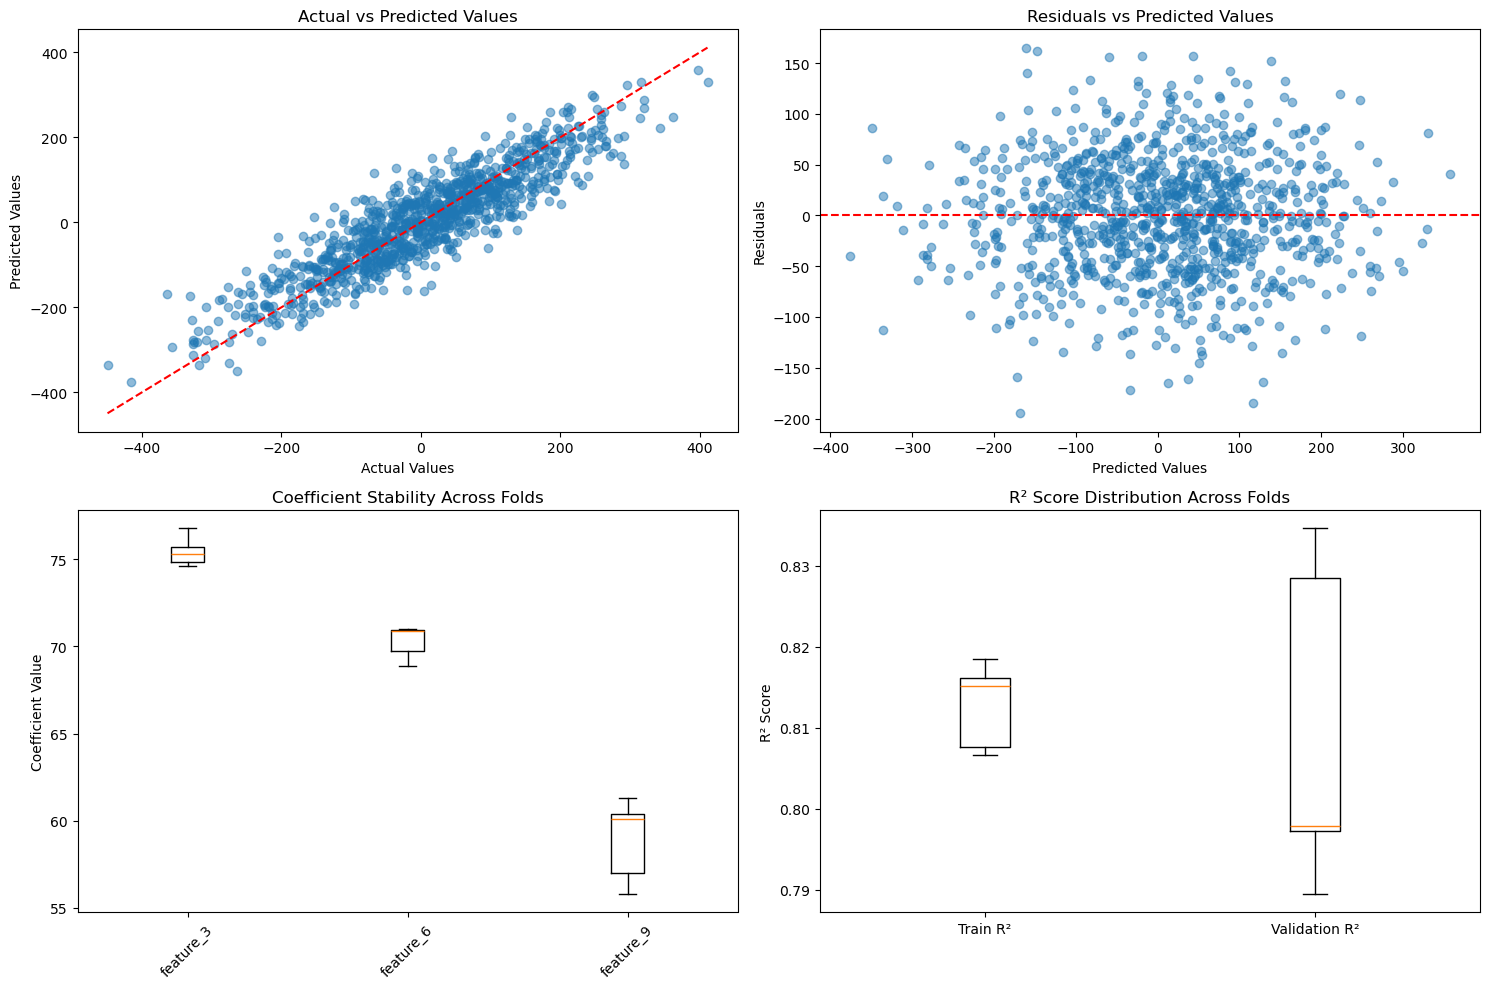

In [32]:
#
# Run cross-validation
#-----------
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    cross_validate,
    cross_val_predict
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from scipy import stats

def create_sample_data(n_samples=1000, n_features=10):
    """Create sample regression data"""
    X, y = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        noise=0.1,
        random_state=42
    )
    feature_names = [f'feature_{i}' for i in range(n_features)]
    X = pd.DataFrame(X, columns=feature_names)
    return X, y

def perform_cross_validation(X, y, n_splits=5):
    """Perform comprehensive cross-validation analysis"""
    
    important_features = ['feature_3', 'feature_6', 'feature_9']
    X_selected = X[important_features]
    
    scaler = StandardScaler()
    model = LinearRegression()
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_metrics = []
    feature_coefficients = []
    predictions = np.zeros_like(y)
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_selected), 1):
        # Split data
        X_train_fold = X_selected.iloc[train_idx]
        y_train_fold = y[train_idx]
        X_val_fold = X_selected.iloc[val_idx]
        y_val_fold = y[val_idx]
        
        # Scale features
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_val_scaled = scaler.transform(X_val_fold)
        
        # Train model
        model.fit(X_train_scaled, y_train_fold)
        
        # Make predictions
        y_train_pred = model.predict(X_train_scaled)
        y_val_pred = model.predict(X_val_scaled)
        
        # Store predictions for this fold
        predictions[val_idx] = y_val_pred
        
        # Calculate metrics
        fold_metrics.append({
            'fold': fold,
            'train_r2': r2_score(y_train_fold, y_train_pred),
            'train_rmse': np.sqrt(mean_squared_error(y_train_fold, y_train_pred)),
            'val_r2': r2_score(y_val_fold, y_val_pred),
            'val_rmse': np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
        })
        
        # Store coefficients
        feature_coefficients.append(
            pd.DataFrame({
                'feature': important_features,
                'coefficient': model.coef_,
                'fold': fold
            })
        )
    
    # Calculate additional cross-validation metrics using sklearn
    cv_scores = cross_validate(
        model,
        X_selected,
        y,
        cv=kf,
        scoring=['r2', 'neg_root_mean_squared_error'],
        return_train_score=True
    )
    
    # Get cross-validated predictions
    cv_predictions = cross_val_predict(model, X_selected, y, cv=kf)
    
    # Prepare results
    results = {
        'fold_metrics': pd.DataFrame(fold_metrics),
        'feature_coefficients': pd.concat(feature_coefficients),
        'cv_scores': cv_scores,
        'predictions': {
            'y_true': y,
            'y_pred': cv_predictions
        }
    }
    
    return results

def print_cv_results(results):
    """Print formatted cross-validation results"""
    print("\nCross-Validation Results")
    print("="*50)
    
    # Print fold-by-fold metrics
    print("\nFold-by-Fold Performance:")
    metrics_summary = results['fold_metrics'].agg({
        'train_r2': ['mean', 'std'],
        'train_rmse': ['mean', 'std'],
        'val_r2': ['mean', 'std'],
        'val_rmse': ['mean', 'std']
    }).round(4)
    print("\nSummary Statistics:")
    print(metrics_summary)
    
    # Print coefficient stability
    coef_summary = results['feature_coefficients'].groupby('feature').agg({
        'coefficient': ['mean', 'std']
    }).round(4)
    print("\nFeature Coefficient Stability:")
    print(coef_summary)
    
    # Calculate prediction metrics
    final_r2 = r2_score(results['predictions']['y_true'], 
                        results['predictions']['y_pred'])
    final_rmse = np.sqrt(mean_squared_error(results['predictions']['y_true'],
                                          results['predictions']['y_pred']))
    
    print("\nFinal Cross-Validated Performance:")
    print(f"R² Score: {final_r2:.4f}")
    print(f"RMSE: {final_rmse:.4f}")
    
    # Calculate confidence intervals for predictions
    residuals = results['predictions']['y_true'] - results['predictions']['y_pred']
    ci = np.std(residuals) * 1.96  # 95% confidence interval
    
    print(f"\n95% Prediction Confidence Interval: ±{ci:.4f}")

def plot_cv_results(results):
    """Plot cross-validation analysis results"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    #Actual vs Predicted
    ax = axes[0, 0]
    ax.scatter(results['predictions']['y_true'], 
              results['predictions']['y_pred'], 
              alpha=0.5)
    ax.plot([min(results['predictions']['y_true']), 
             max(results['predictions']['y_true'])],
            [min(results['predictions']['y_true']), 
             max(results['predictions']['y_true'])],
            'r--')
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title('Actual vs Predicted Values')
    
    #Residuals Plot
    ax = axes[0, 1]
    residuals = results['predictions']['y_true'] - results['predictions']['y_pred']
    ax.scatter(results['predictions']['y_pred'], residuals, alpha=0.5)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residuals vs Predicted Values')
    
    #Coefficient Stability
    ax = axes[1, 0]
    coef_data = results['feature_coefficients']
    for feature in coef_data['feature'].unique():
        coeffs = coef_data[coef_data['feature'] == feature]['coefficient']
        ax.boxplot(coeffs, positions=[list(coef_data['feature'].unique()).index(feature)])
    ax.set_xticklabels(coef_data['feature'].unique(), rotation=45)
    ax.set_ylabel('Coefficient Value')
    ax.set_title('Coefficient Stability Across Folds')
    
    #Performance Distribution
    ax = axes[1, 1]
    metrics = results['fold_metrics']
    ax.boxplot([metrics['train_r2'], metrics['val_r2']], labels=['Train R²', 'Validation R²'])
    ax.set_ylabel('R² Score')
    ax.set_title('R² Score Distribution Across Folds')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Create sample data
    X, y = create_sample_data(n_samples=1000, n_features=10)
    
    # Perform cross-validation
    results = perform_cross_validation(X, y, n_splits=5)
    
    # Print results
    print_cv_results(results)
    
    # Plot results
    plot_cv_results(results)


## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

The bias-variance tradeoff is a fundamental concept in machine learning that balances two types of errors: bias, which occurs when a model is too simple to capture underlying patterns (leading to underfitting), and variance, which arises when a model is overly complex and sensitive to noise in the training data (leading to overfitting). This tradeoff is relevant in machine learning because finding the right model complexity is crucial for generalizing unseen data.


2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting occurs when a machine learning model learns the training data "too well", capturing noise rather than true patterns, which results in poor performance on new data despite excellent performance on training data. The problem matters because it defeats the core purpose of machine learning - to create models that can generalize and make accurate predictions on unseen data. Common solutions include using cross-validation, adding regularization, simplifying the model architecture, implementing early stopping, and applying dropout techniques to force the model to learn more robust patterns.

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

I would prioritize the south and southeast regions for the pilot program. Specifically, I would incorporate this program for Barbour County for several reasons: The highest per capita rates of diabetes and obesity among the counties shown, manageable population size (25,782) for a pilot, and unique demographic challenges including a significant gender imbalance (115.9 males per 100 females in adult population). Regarding race and age, racial composition should be considered given Alabama's history and existing health disparities. The gender imbalance varies significantly between age groups (particularly in Barbour and Bibb counties), which may require tailored intervention strategies. Baldwin County has a much larger elderly population (19.5%) than others (~14-15%).

Regarding model deployment confidence, I would be moderately confident using this data to guide initial program placement, but would strongly recommend gathering additional data on healthcare access/facilities, economic indicators, historical intervention success rates, more detailed racial/ethnic health disparity data, and social determinants of health (education, income, food access). The current dataset provides a good foundation but needs supplementation for optimal program design and targeting.ma  